In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import LeaveOneOut,cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.kernel_approximation import PolynomialCountSketch
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [5]:
#generate and filter the data
data = pd.read_csv('new_data.csv')
data['Sex'] = data['Sex'].replace('M',1)
data['Sex'] = data['Sex'].replace('F',0)
data['Side'] = data['Side'].replace('L',0)
data['Side'] = data['Side'].replace('R',1)
X = data[['Age','Sex','BMI','GX AT VO2 (mL/kg/min)','GX AT VE/VCO2','GX VO2 Max VO2 (mL/kg/min)','GX VO2 Max VO2/Pred (%)','GX VO2 Max VO2/HR (mL/beat)','GX Predicted VO2/HR (mL/beat)','GX Work Max Work (Watts)','GX Predicted Work (Watts)','PF Pre FEV1/FVC (%)','PF Pre FEV1 (L)','Side','pred mort','LOS']]
X = X.dropna(axis=0)

# #separate X,y
# X1 = X[['Age','Sex','BMI','GX AT VO2 (mL/kg/min)','GX AT VE/VCO2','GX VO2 Max VO2 (mL/kg/min)','GX VO2 Max VO2/Pred (%)','GX VO2 Max VO2/HR (mL/beat)','GX Predicted VO2/HR (mL/beat)','GX Work Max Work (Watts)','GX Predicted Work (Watts)','PF Pre FEV1/FVC (%)','PF Pre FEV1 (L)','Side','pred mort']]
# y = X[['LOS']]

In [6]:
X2 = X[['Age','Sex','BMI','GX AT VO2 (mL/kg/min)','GX AT VE/VCO2','GX VO2 Max VO2 (mL/kg/min)','GX VO2 Max VO2/Pred (%)','GX VO2 Max VO2/HR (mL/beat)','GX Predicted VO2/HR (mL/beat)','GX Work Max Work (Watts)','GX Predicted Work (Watts)','PF Pre FEV1/FVC (%)','PF Pre FEV1 (L)','Side','pred mort','LOS']]

In [7]:
X2
X2=X2.rename(columns= {"GX VO2 Max VO2 (mL/kg/min)":'G2',"GX AT VO2 (mL/kg/min)" : "G0", "GX AT VE/VCO2" : "G1",
                        'GX VO2 Max VO2/Pred (%)' : 'G3','GX VO2 Max VO2/HR (mL/beat)':'G4','GX Predicted VO2/HR (mL/beat)':'G5','GX Work Max Work (Watts)':'G6','GX Predicted Work (Watts)':'G7','PF Pre FEV1/FVC (%)':'G8','PF Pre FEV1 (L)':'G9', 'pred mort' : 'predmort'})
X2.shape

(222, 16)

In [8]:
X2 = X2.drop(X2[(X2['G8'] == 0.0)|(X2['G9'] == 0.0)].index)
X2.shape

(186, 16)

In [10]:
X_value = X2[['Age','Sex','BMI','G0','G1','G2','G3','G4','G5','G6','G7','G8','G9','Side','predmort']]
y_value = X2[['LOS']]

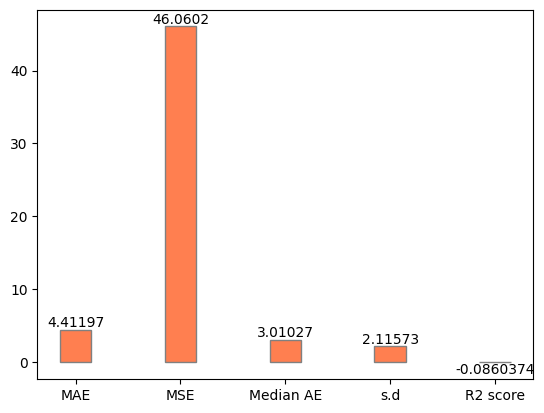

In [12]:
x_data = ('MAE','MSE','Median AE','s.d','R2 score')
y_data = [MAE,MSE,Median,SD,r2]
color = 'coral'
bar = plt.bar(x_data,y_data,0.3,color=color,edgecolor ='grey')
plt.bar_label(bar, label_type='edge');

In [52]:
loo = LeaveOneOut()
reg = LinearRegression()
sc = StandardScaler()
y = np.array(y_value)
X1 = np.array(X_value)
X1 = sc.fit_transform(X1)
mean_ab_error = []
mean_sq_error = []
median_error = []
pred = []
y_true = []
for train_index, test_index in loo.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    
    reg.fit(X_train,y_train)
    
    predict_data = reg.predict(X_test)
    pred.append(predict_data)
    y_true.append(y_test)
    
    mean_ab_error.append(mean_absolute_error(y_test,predict_data))
    mean_sq_error.append(mean_squared_error(y_test,predict_data))
    median_error.append(median_absolute_error(y_test,predict_data))

print("Leave one out validation")
MAE = np.sum(np.array(mean_ab_error)) / len(mean_ab_error)
print(f"MAE of the model is {MAE}")
MSE = np.sum(np.array(mean_sq_error)) / len(mean_sq_error)
print(f"MSE of the model is {MSE}")
Median = np.median(np.array(median_error))
print(f"Median absolute error of the model is {Median}")
SD = np.std(pred)
print(f"Standard Deviation of the model is {SD}")
# r2 = r2_score(y_true,pred)
# print(f"R2 score of the model is {r2}")
y_new = np.array(y_true).reshape(-1)
pred_new = np.array(pred).reshape(-1)
r2 = r2_score(y_new,pred_new)
print(f"R2 score of the model is {r2}")

Leave one out validation
MAE of the model is 4.411971219452367
MSE of the model is 46.06024727998732
Median absolute error of the model is 3.010265209459232
Standard Deviation of the model is 2.115734429391272
R2 score of the model is -0.08603739545891376


In [13]:
loo = LeaveOneOut()
reg = linear_model.Ridge(alpha=1.0)
sc = StandardScaler()
y = np.array(y_value)
X1 = np.array(X_value)
X1 = sc.fit_transform(X1)
mean_ab_error = []
mean_sq_error = []
median_error = []
pred = []
y_true = []
for train_index, test_index in loo.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    
    reg.fit(X_train,y_train)
    
    predict_data = reg.predict(X_test)
    pred.append(predict_data)
    y_true.append(y_test)
    
    mean_ab_error.append(mean_absolute_error(y_test,predict_data))
    mean_sq_error.append(mean_squared_error(y_test,predict_data))
    median_error.append(median_absolute_error(y_test,predict_data))

print("Leave one out validation")
MAE = np.sum(np.array(mean_ab_error)) / len(mean_ab_error)
print(f"MAE of the model is {MAE}")
MSE = np.sum(np.array(mean_sq_error)) / len(mean_sq_error)
print(f"MSE of the model is {MSE}")
Median = np.median(np.array(median_error))
print(f"Median absolute error of the model is {Median}")
SD = np.std(pred)
print(f"Standard Deviation of the model is {SD}")
# r2 = r2_score(y_true,pred)
# print(f"R2 score of the model is {r2}")
y_new = np.array(y_true).reshape(-1)
pred_new = np.array(pred).reshape(-1)
r2 = r2_score(y_new,pred_new)
print(f"R2 score of the model is {r2}")

Leave one out validation
MAE of the model is 4.403257119501243
MSE of the model is 45.92315527376255
Median absolute error of the model is 2.9922339065115584
Standard Deviation of the model is 2.0935780300818374
R2 score of the model is -0.08280495416363509


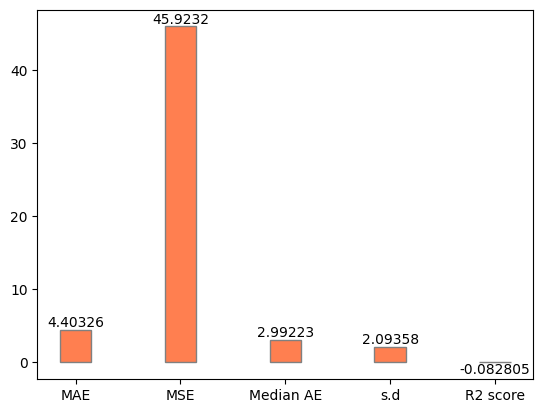

In [14]:
x_data = ('MAE','MSE','Median AE','s.d','R2 score')
y_data = [MAE,MSE,Median,SD,r2]
color = 'coral'
bar = plt.bar(x_data,y_data,0.3,color=color,edgecolor ='grey')
plt.bar_label(bar, label_type='edge');

In [55]:
#Lasso model
loo = LeaveOneOut()
model_lasso = Lasso(alpha=0.9)
y = np.array(y_value)
X1 = np.array(X_value)
X1 = sc.fit_transform(X1)
mean_ab_error = []
mean_sq_error = []
median_error = []
pred = []
y_true = []
for train_index, test_index in loo.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    
    model_lasso.fit(X_train,y_train)
    
    predict_data = model_lasso.predict(X_test)
    pred.append(predict_data)
    y_true.append(y_test)
    
    mean_ab_error.append(mean_absolute_error(y_test,predict_data))
    mean_sq_error.append(mean_squared_error(y_test,predict_data))
    median_error.append(median_absolute_error(y_test,predict_data))

print("Leave one out validation")
MAE = np.sum(np.array(mean_ab_error)) / len(mean_ab_error)
print(f"MAE of the model is {MAE}")
MSE = np.sum(np.array(mean_sq_error)) / len(mean_sq_error)
print(f"MSE of the model is {MSE}")
Median = np.median(np.array(median_error))
print(f"Median absolute error of the model is {Median}")
SD = np.std(pred)
print(f"Standard Deviation of the model is {SD}")
# r2 = r2_score(y_true,pred)
# print(f"R2 score of the model is {r2}")
y_new = np.array(y_true).reshape(-1)
pred_new = np.array(pred).reshape(-1)
r2 = r2_score(y_new,pred_new)
print(f"R2 score of the model is {r2}")

Leave one out validation
MAE of the model is 4.2655953550634464
MSE of the model is 43.00998707230443
Median absolute error of the model is 3.324482163353877
Standard Deviation of the model is 0.309018692956219
R2 score of the model is -0.014116447416951727


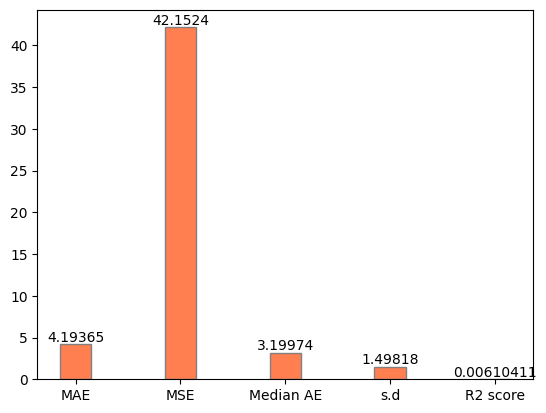

In [16]:
x_data = ('MAE','MSE','Median AE','s.d','R2 score')
y_data = [MAE,MSE,Median,SD,r2]
color = 'coral'
bar = plt.bar(x_data,y_data,0.3,color=color,edgecolor ='grey')
plt.bar_label(bar, label_type='edge');

In [17]:
#Elastic model
loo = LeaveOneOut()
model_enet = ElasticNet(alpha=1.0)
y = np.array(y_value)
X1 = np.array(X_value)
mean_ab_error = []
mean_sq_error = []
median_error = []
pred = []
y_true = []
for train_index, test_index in loo.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    
    model_enet.fit(X_train,y_train)
    
    predict_data = model_enet.predict(X_test)
    pred.append(predict_data)
    y_true.append(y_test)
    
    mean_ab_error.append(mean_absolute_error(y_test,predict_data))
    mean_sq_error.append(mean_squared_error(y_test,predict_data))
    median_error.append(median_absolute_error(y_test,predict_data))

print("Leave one out validation")
MAE = np.sum(np.array(mean_ab_error)) / len(mean_ab_error)
print(f"MAE of the model is {MAE}")
MSE = np.sum(np.array(mean_sq_error)) / len(mean_sq_error)
print(f"MSE of the model is {MSE}")
Median = np.median(np.array(median_error))
print(f"Median absolute error of the model is {Median}")
SD = np.std(pred)
print(f"Standard Deviation of the model is {SD}")
# r2 = r2_score(y_true,pred)
# print(f"R2 score of the model is {r2}")
y_new = np.array(y_true).reshape(-1)
pred_new = np.array(pred).reshape(-1)
r2 = r2_score(y_new,pred_new)
print(f"R2 score of the model is {r2}")

Leave one out validation
MAE of the model is 4.222847146965465
MSE of the model is 42.69698538883661
Median absolute error of the model is 3.214039789374567
Standard Deviation of the model is 1.6003783047949396
R2 score of the model is -0.006736297435964822


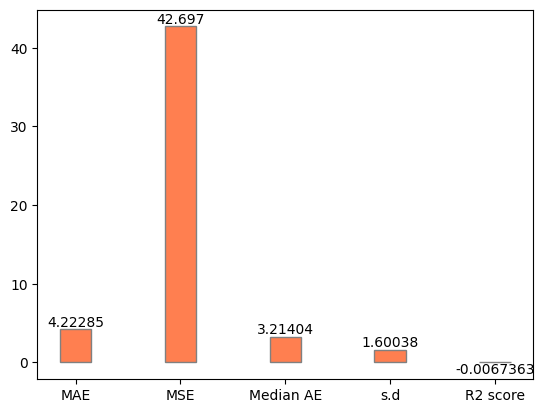

In [18]:
x_data = ('MAE','MSE','Median AE','s.d','R2 score')
y_data = [MAE,MSE,Median,SD,r2]
color = 'coral'
bar = plt.bar(x_data,y_data,0.3,color=color,edgecolor ='grey')
plt.bar_label(bar, label_type='edge');

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [20]:
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

y = np.array(y_value)
X1 = np.array(X_value)
mean_ab_error = []
mean_sq_error = []
median_error = []
pred = []
y_true = []
for train_index, test_index in loo.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    
    poly_reg.fit(X_train,y_train)
    
    predict_data = poly_reg.predict(X_test)
    pred.append(predict_data)
    y_true.append(y_test)
    
    mean_ab_error.append(mean_absolute_error(y_test,predict_data))
    mean_sq_error.append(mean_squared_error(y_test,predict_data))
    median_error.append(median_absolute_error(y_test,predict_data))

print("Leave one out validation")
MAE = np.sum(np.array(mean_ab_error)) / len(mean_ab_error)
print(f"MAE of the model is {MAE}")
MSE = np.sum(np.array(mean_sq_error)) / len(mean_sq_error)
print(f"MSE of the model is {MSE}")
Median = np.median(np.array(median_error))
print(f"Median absolute error of the model is {Median}")
SD = np.std(pred)
print(f"Standard Deviation of the model is {SD}")
# r2 = r2_score(y_true,pred)
# print(f"R2 score of the model is {r2}")
y_new = np.array(y_true).reshape(-1)
pred_new = np.array(pred).reshape(-1)
r2 = r2_score(y_new,pred_new)
print(f"R2 score of the model is {r2}")

Leave one out validation
MAE of the model is 20.86991687489898
MSE of the model is 853.5615294223873
Median absolute error of the model is 15.96266810489362
Standard Deviation of the model is 27.827335429541648
R2 score of the model is -19.125809022319075


In [21]:
from sklearn.kernel_approximation import PolynomialCountSketch

In [22]:
ps = PolynomialCountSketch(degree=3,n_components=15)
lg = LinearRegression()
y = np.array(y_value)
X1 = np.array(X_value)
X1 = ps.fit_transform(X1)
mean_ab_error = []
mean_sq_error = []
median_error = []
pred = []
y_true = []
for train_index, test_index in loo.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    
    lg.fit(X_train,y_train)
    
    predict_data = lg.predict(X_test)
    pred.append(predict_data)
    y_true.append(y_test)
    
    mean_ab_error.append(mean_absolute_error(y_test,predict_data))
    mean_sq_error.append(mean_squared_error(y_test,predict_data))
    median_error.append(median_absolute_error(y_test,predict_data))

print("Leave one out validation")
MAE = np.sum(np.array(mean_ab_error)) / len(mean_ab_error)
print(f"MAE of the model is {MAE}")
MSE = np.sum(np.array(mean_sq_error)) / len(mean_sq_error)
print(f"MSE of the model is {MSE}")
Median = np.median(np.array(median_error))
print(f"Median absolute error of the model is {Median}")
SD = np.std(pred)
print(f"Standard Deviation of the model is {SD}")
# r2 = r2_score(y_true,pred)
# print(f"R2 score of the model is {r2}")
y_new = np.array(y_true).reshape(-1)
pred_new = np.array(pred).reshape(-1)
r2 = r2_score(y_new,pred_new)
print(f"R2 score of the model is {r2}")

Leave one out validation
MAE of the model is 4.467863186802527
MSE of the model is 47.243473233849485
Median absolute error of the model is 3.194345018689712
Standard Deviation of the model is 2.06621025345769
R2 score of the model is -0.11393623901831829


In [23]:
ps = PolynomialCountSketch(degree=2,n_components=15)
lg = LinearRegression()
y = np.array(y_value)
X1 = np.array(X_value)
X1 = ps.fit_transform(X1)
mean_ab_error = []
mean_sq_error = []
median_error = []
pred = []
y_true = []
for train_index, test_index in loo.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    
    lg.fit(X_train,y_train)
    
    predict_data = lg.predict(X_test)
    pred.append(predict_data)
    y_true.append(y_test)
    
    mean_ab_error.append(mean_absolute_error(y_test,predict_data))
    mean_sq_error.append(mean_squared_error(y_test,predict_data))
    median_error.append(median_absolute_error(y_test,predict_data))

print("Leave one out validation")
MAE = np.sum(np.array(mean_ab_error)) / len(mean_ab_error)
print(f"MAE of the model is {MAE}")
MSE = np.sum(np.array(mean_sq_error)) / len(mean_sq_error)
print(f"MSE of the model is {MSE}")
Median = np.median(np.array(median_error))
print(f"Median absolute error of the model is {Median}")
SD = np.std(pred)
print(f"Standard Deviation of the model is {SD}")
# r2 = r2_score(y_true,pred)
# print(f"R2 score of the model is {r2}")
y_new = np.array(y_true).reshape(-1)
pred_new = np.array(pred).reshape(-1)
r2 = r2_score(y_new,pred_new)
print(f"R2 score of the model is {r2}")

Leave one out validation
MAE of the model is 4.343588086126658
MSE of the model is 44.63739108787184
Median absolute error of the model is 3.2825528142629308
Standard Deviation of the model is 2.2136332740535636
R2 score of the model is -0.05248839986615472


In [24]:
ps = PolynomialCountSketch(degree=4,n_components=15)
lg = LinearRegression()
y = np.array(y_value)
X1 = np.array(X_value)
X1 = ps.fit_transform(X1)
mean_ab_error = []
mean_sq_error = []
median_error = []
pred = []
y_true = []
for train_index, test_index in loo.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    
    lg.fit(X_train,y_train)
    
    predict_data = lg.predict(X_test)
    pred.append(predict_data)
    y_true.append(y_test)
    
    mean_ab_error.append(mean_absolute_error(y_test,predict_data))
    mean_sq_error.append(mean_squared_error(y_test,predict_data))
    median_error.append(median_absolute_error(y_test,predict_data))

print("Leave one out validation")
MAE = np.sum(np.array(mean_ab_error)) / len(mean_ab_error)
print(f"MAE of the model is {MAE}")
MSE = np.sum(np.array(mean_sq_error)) / len(mean_sq_error)
print(f"MSE of the model is {MSE}")
Median = np.median(np.array(median_error))
print(f"Median absolute error of the model is {Median}")
SD = np.std(pred)
print(f"Standard Deviation of the model is {SD}")
# r2 = r2_score(y_true,pred)
# print(f"R2 score of the model is {r2}")
y_new = np.array(y_true).reshape(-1)
pred_new = np.array(pred).reshape(-1)
r2 = r2_score(y_new,pred_new)
print(f"R2 score of the model is {r2}")

Leave one out validation
MAE of the model is 4.545906210783815
MSE of the model is 48.420405587564524
Median absolute error of the model is 3.3568231288665085
Standard Deviation of the model is 2.2863199903943836
R2 score of the model is -0.1416866881266401


In [48]:
ps = PolynomialCountSketch(degree=8,n_components=15)
lg = LinearRegression()
y = np.array(y_value)
X1 = np.array(X_value)
X1 = ps.fit_transform(X1)
mean_ab_error = []
mean_sq_error = []
median_error = []
pred = []
y_true = []
for train_index, test_index in loo.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    
    lg.fit(X_train,y_train)
    
    predict_data = lg.predict(X_test)
    pred.append(predict_data)
    y_true.append(y_test)
    
    mean_ab_error.append(mean_absolute_error(y_test,predict_data))
    mean_sq_error.append(mean_squared_error(y_test,predict_data))
    median_error.append(median_absolute_error(y_test,predict_data))

print("Leave one out validation")
MAE = np.sum(np.array(mean_ab_error)) / len(mean_ab_error)
print(f"MAE of the model is {MAE}")
MSE = np.sum(np.array(mean_sq_error)) / len(mean_sq_error)
print(f"MSE of the model is {MSE}")
Median = np.median(np.array(median_error))
print(f"Median absolute error of the model is {Median}")
SD = np.std(pred)
print(f"Standard Deviation of the model is {SD}")
# r2 = r2_score(y_true,pred)
# print(f"R2 score of the model is {r2}")
y_new = np.array(y_true).reshape(-1)
pred_new = np.array(pred).reshape(-1)
r2 = r2_score(y_new,pred_new)
print(f"R2 score of the model is {r2}")

Leave one out validation
MAE of the model is 4.584797933471268
MSE of the model is 48.61711251870889
Median absolute error of the model is 3.2966963097971798
Standard Deviation of the model is 2.3609420476874265
R2 score of the model is -0.14632476750711199


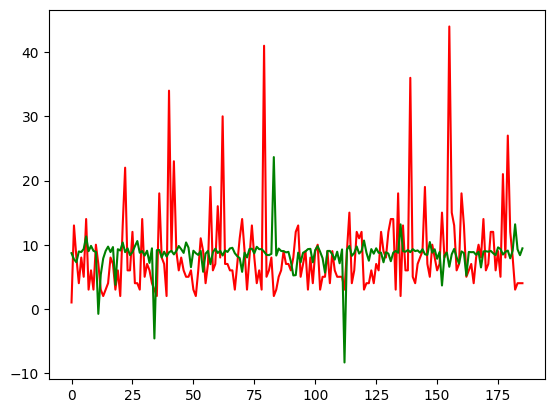

In [50]:
plt.plot(y_new,'r-')
plt.plot(pred_new,'g-')